In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import csv
import copy
from tqdm import tqdm
from time import sleep
from torch import nn
from torch_geometric.data import Batch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, global_mean_pool

from gene_inference import data_loader, GCNInferenceNetwork, 

In [2]:
devices = torch.device('cuda')

## Load data

In [3]:
gene_name = np.loadtxt('gene_name.txt', dtype=str)
gene_edge = np.loadtxt('gene_edge.txt', dtype=str)

In [4]:
# create mapping table from genes to nodes number
node_map = {}
for i, j in enumerate(gene_name): 
    node_map.update({j:i})

In [5]:
gene_set = set(["App", "Apoe", "Gusb","Lamp5","Mbp","Pvalb","S100b","Slc30a3","Snca","Mapt"])

In [ ]:
edge_list = filterEdgeListByGene('Gusb', gene_edge, gene_set)
edge_list = torch.tensor(np.array(edge_list).T, dtype=torch.long)
edge_list.size()

In [7]:
# load training data
train_loader = data_loader('input_train_cat.csv', gene='gusb', node_map=node_map,
                           edge_list=edge_list, multiplier=1e-5)

# load validation data
validate_loader = data_loader('input_test_cat.csv', gene='gusb', node_map=node_map,
                              edge_list=edge_list, multiplier=1e-5)

In [9]:
print(len(train_loader))
print(len(validate_loader))

18542
4636


In [10]:
print(train_loader[0].x.size())
print(train_loader[0].y.size())
print(train_loader[0].edge_index.size())

torch.Size([1431, 1])
torch.Size([1, 1])
torch.Size([2, 488146])


## Train GCN

In [12]:
model = GCNInferenceNetwork().to(torch.device('cuda'))
train_loss_lis = []
validate_loss_lis = []
train_batch_size = 32
validate_batch_size = 32
epochs = 20

for i in range(epochs): 
    
    train_loss = train(model, train_loader, train_batch_size)
    train_loss_lis.append(train_loss)
    
    val_loss = validate(model, validate_loader, validate_batch_size)
    validate_loss_lis.append(val_loss)
    
    # print ('epochs: %d || train_losses: %f || train_mse: %f || val_loss: %f || val_mse: %f' \
          # %(i, train_loss, train_mse, val_loss, val_mse))
    # print ('epochs: %d || train_losses: %f' %(i, train_loss))

100%|██████████| 579/579 [03:21<00:00,  2.87it/s, loss=34.1]


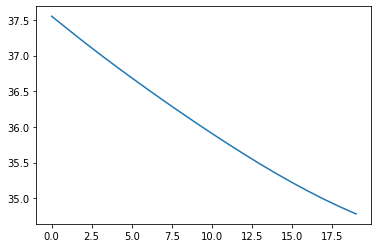

In [13]:
ep = [i for i in range(20)]
plt.plot(ep, validate_loss_lis)